# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [6]:
%%R -o df
 
# Import data with R
df <- read_csv('data/2023_subway_censusvar_agg.csv')
df %>% head(4)

Rows: 362 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): Common Name, Equipment Description, GTFS Stop ID, Division, Line, ...
dbl (20): GEOID, Station MRN, Station ID, Complex ID, lat, long, ADA, STATE,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 4 × 35
        GEOID `Common Name` `Equipment Description`   `Station MRN` `Station ID`
        <dbl> <chr>         <chr>                             <dbl>        <dbl>
1 36005006500 EL130         ELE: EL130 - 434 - 3 Av-…           434          434
2 36005006500 EL129         ELE: EL129 - 434 - 3 Av-…           434          434
3 36005008300 EL516         ELE: EL516 - 373 - E 149…           373          373
4 36005008300 EL515         ELE: EL515 - 373 - E 149…           373          373
# ℹ 30 more variables: `Complex ID` <dbl>, `GTFS Stop ID` <chr

## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [14]:
%%R 
discrete_variables <- c('Borough', 'Station MRN', 'Line')

# 👉 Select the discrete variables only and make a pivot table for each
# so we know how many cars there are in each category (for example, how many automatic vs manual)?

# change `discrete_variables` to strings
df <- df %>% mutate(across(all_of(discrete_variables), as.character))

df %>% 
    select(discrete_variables) %>%
    pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
    group_by(variable, value) %>% 
    summarize(
        count = n()
    ) %>%
    arrange(desc(count))

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.


# A tibble: 177 × 3
# Groups:   variable [3]
   variable value               count
   <chr>    <chr>               <int>
 1 Borough  M                     178
 2 Borough  Bk                     84
 3 Borough  Q                      56
 4 Line     8th Av - Fulton St     52
 5 Borough  Bx                     42
 6 Line     Broadway - 7Av         41
 7 Line     Lexington Av           27
 8 Line     Broadway - Brighton    23
 9 Line     6th Av - Culver        18
10 Line     Queens Blvd            18
# ℹ 167 more rows
# ℹ Use `print(n = ...)` to see more rows


In [22]:
%%R
# SAMPLE CODE

discrete_variables <- c('vs', 'am', 'gear', 'carb')
# 👉 Select the discrete variables only and make a pivot table for each
# so we know how many cars there are in each category (for example, how many automatic vs manual)?

mtcars %>% 
    select(discrete_variables) %>%
    pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
    group_by(variable, value) %>% 
    summarize(
        count = n()
    )

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.


# A tibble: 13 × 3
# Groups:   variable [4]
   variable value count
   <chr>    <dbl> <int>
 1 am           0    19
 2 am           1    13
 3 carb         1     7
 4 carb         2    10
 5 carb         3     3
 6 carb         4    10
 7 carb         6     1
 8 carb         8     1
 9 gear         3    15
10 gear         4    12
11 gear         5     5
12 vs           0    18
13 vs           1    14


## 1-D visualizations (aka distributions)


### Continuous variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

In [15]:
%%R
df %>% head(4)

# A tibble: 4 × 35
        GEOID `Common Name` `Equipment Description`   `Station MRN` `Station ID`
        <dbl> <chr>         <chr>                     <chr>                <dbl>
1 36005006500 EL130         ELE: EL130 - 434 - 3 Av-… 434                    434
2 36005006500 EL129         ELE: EL129 - 434 - 3 Av-… 434                    434
3 36005008300 EL516         ELE: EL516 - 373 - E 149… 373                    373
4 36005008300 EL515         ELE: EL515 - 373 - E 149… 373                    373
# ℹ 30 more variables: `Complex ID` <dbl>, `GTFS Stop ID` <chr>,
#   Division <chr>, Line <chr>, `Stop Name` <chr>, Borough <chr>,
#   `Daytime Routes` <chr>, Structure <chr>, lat <dbl>, long <dbl>,
#   `North Direction Label` <chr>, `South Direction Label` <chr>, ADA <dbl>,
#   `ADA Notes` <chr>, Georeference <chr>, STATE <dbl>, COUNTY <dbl>,
#   TRACT <dbl>, BLOCK <dbl>, NAME <chr>, geometry <chr>,
#   population_estimate <dbl>, sub_pop_estimate <dbl>, …


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 11 rows containing non-finite values (`stat_bin()`). 



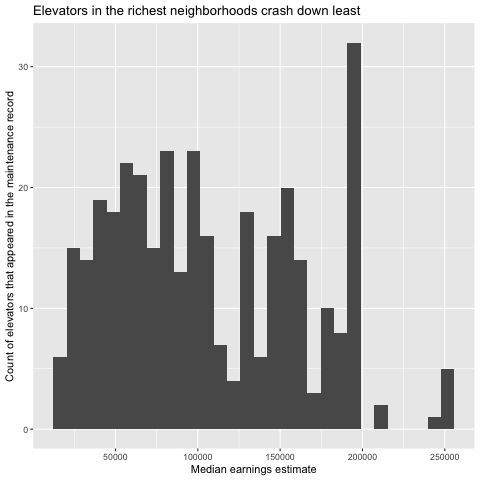

In [19]:
%%R
df %>%
ggplot()+
aes(med_earn_estimate) +
geom_histogram() +
labs(title = "Elevators in the richest neighborhoods crash down least",
     x = "Median earnings estimate",
     y = "Count of elevators that appeared in the maintenance record") 

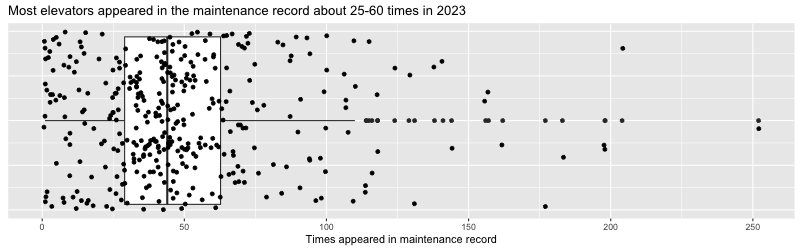

In [25]:
%%R -w 800 -h 250

df %>%
    ggplot()+
    aes(x=outage_count, y=1) +
    geom_boxplot() +
    geom_jitter() + 
    labs(
        x = "Times appeared in maintenance record",
        title = "Most elevators appeared in the maintenance record about 25-60 times in 2023"
    ) +
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank()
    )


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 11 rows containing non-finite values (`stat_density()`). 



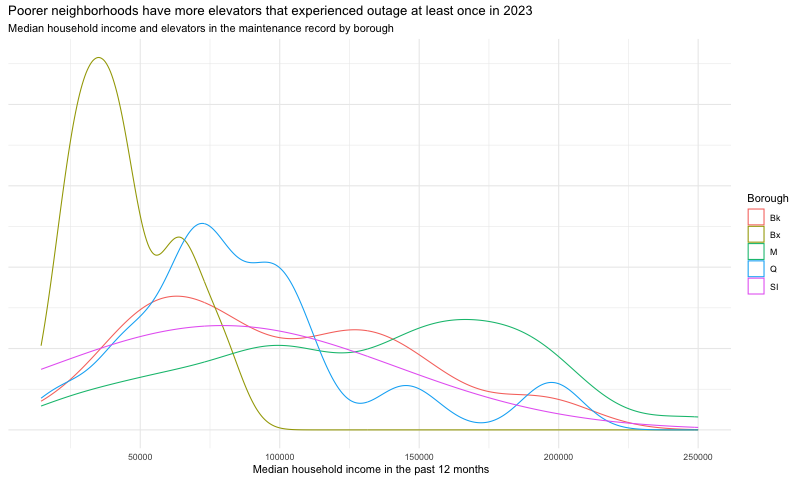

In [40]:
%%R -w 800
# code for plot 1
df %>%
ggplot() +
       aes(x = med_earn_estimate, color=Borough)+
    geom_density() +
    labs(
        title = "Poorer neighborhoods have more elevators that experienced outage at least once in 2023",
        subtitle = "Median household income and elevators in the maintenance record by borough",
        x = " Median household income in the past 12 months",
    ) +
    theme_minimal() +
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank()
    ) 

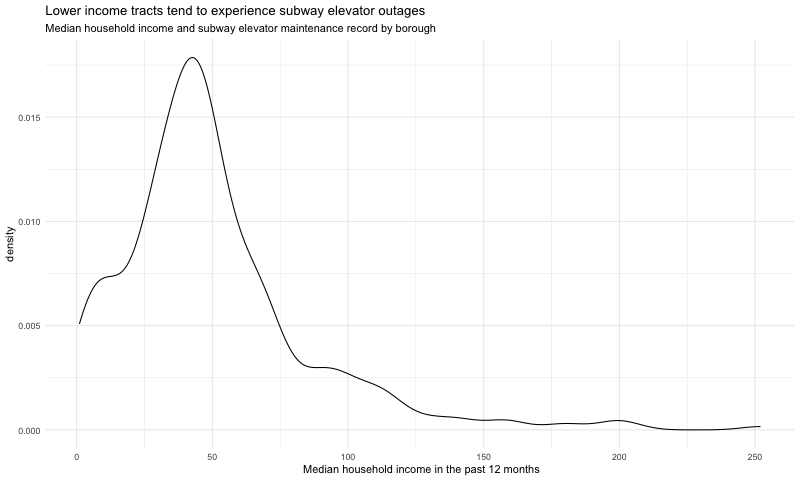

In [7]:
%%R -w 800
# code for plot 2
df %>%
ggplot() +
       aes(x = outage_count) +
    geom_density() +
    labs(
        title = "Lower income tracts tend to experience subway elevator outages",
        subtitle = "Median household income and subway elevator maintenance record by borough",
        x = " Median household income in the past 12 months",
    ) +
    theme_minimal() +
    theme(
        axis.ticks.y = element_blank(),
    ) 

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 11 rows containing non-finite values (`stat_boxplot()`). 



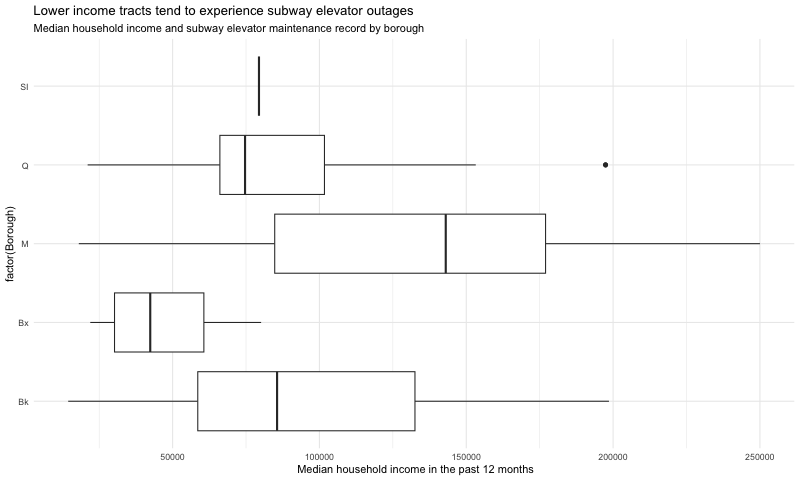

In [39]:
%%R -w 800
# code for plot 2
df %>%
ggplot() +
       aes(x = med_earn_estimate, y=factor(Borough)) +
    geom_boxplot() +
    labs(
        title = "Lower income tracts tend to experience subway elevator outages",
        subtitle = "Median household income and subway elevator maintenance record by borough",
        x = " Median household income in the past 12 months",
    ) +
    theme_minimal() +
    theme(
        axis.ticks.y = element_blank(),
    ) 

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

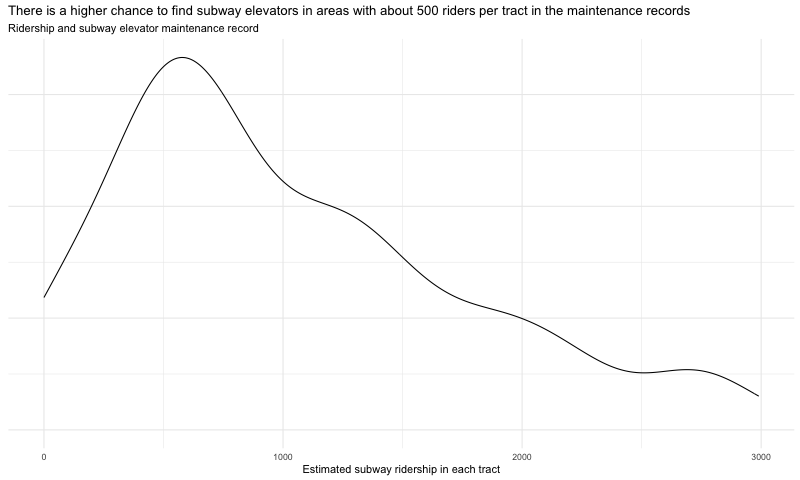

In [41]:
%%R -w 800
# code for plot 1
df %>%
    ggplot() +
    aes(x = sub_pop_estimate) +
    geom_density() +
    labs(
        title="There is a higher chance to find subway elevators in areas with about 500 riders per tract in the maintenance records",
        subtitle="Ridership and subway elevator maintenance record",
        x="Estimated subway ridership in each tract",
    ) +
    theme_minimal() +
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank(),
         ) 

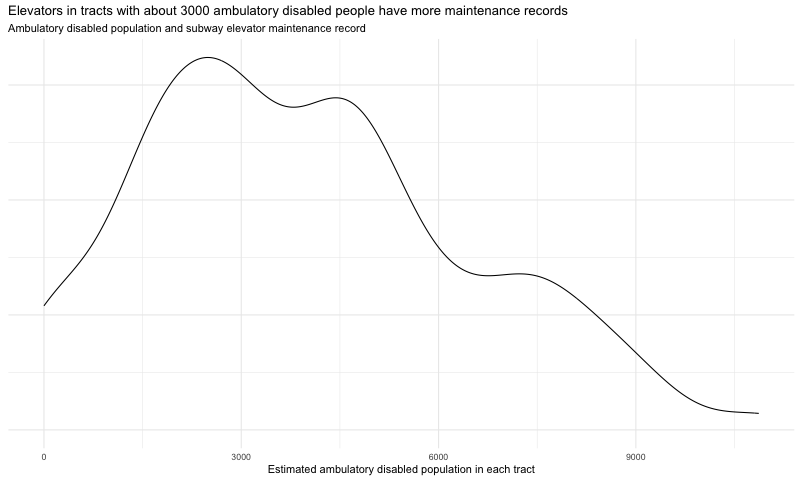

In [33]:
%%R -w 800
# code for plot 1
df %>%
    ggplot() +
    aes(x = amb_pop_estimate) +
    geom_density() +
    labs(
        title="Elevators in tracts with about 3000 ambulatory disabled people have more maintenance records",
        subtitle="Ambulatory disabled population and subway elevator maintenance record",
        x="Estimated ambulatory disabled population in each tract",
    ) +
    theme_minimal() +
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank(),
         ) 